# PROBLEM STATEMENT: We will create a model to predict the strength of the concrete based on data

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load the dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/priyanshugithub2003/Datasets_Data_Science/main/concrete.csv")

### Explore the dataset and look for the missing values in any form

In [3]:
df.shape

(1030, 9)

In [4]:
df.sample(10)
# 0 can be included under these columns

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
239,439.0,177.0,0.0,186.0,11.1,884.9,707.9,56,71.70
625,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,100,47.74
82,277.0,0.0,0.0,191.0,0.0,968.0,856.0,90,31.25
1021,203.5,305.3,0.0,203.5,0.0,963.4,630.0,3,9.56
1016,140.0,133.0,103.0,200.0,7.0,916.0,753.0,28,36.44
915,385.0,0.0,0.0,186.0,0.0,966.0,763.0,7,23.22
600,277.0,0.0,0.0,191.0,0.0,968.0,856.0,3,11.36
885,500.1,0.0,0.0,200.0,3.0,1124.4,613.2,28,44.13
892,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
68,295.7,0.0,95.6,171.5,8.9,955.1,859.2,100,52.04


In [5]:
df.isnull().sum()
# No Null values

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
df.info()
# All int or float data types indicates no missing values in character form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


array([[<AxesSubplot:title={'center':'cement'}>,
        <AxesSubplot:title={'center':'slag'}>,
        <AxesSubplot:title={'center':'ash'}>],
       [<AxesSubplot:title={'center':'water'}>,
        <AxesSubplot:title={'center':'superplastic'}>,
        <AxesSubplot:title={'center':'coarseagg'}>],
       [<AxesSubplot:title={'center':'fineagg'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'strength'}>]], dtype=object)

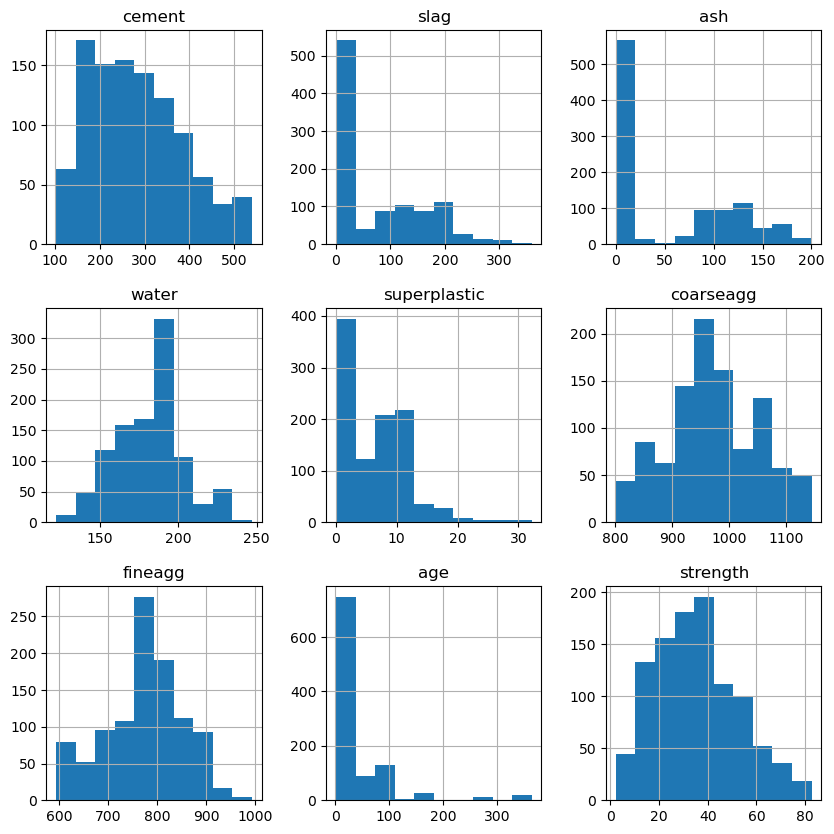

In [8]:
df.hist(figsize=(10,10))

In [9]:
# To increase the limit of the max number of rows and columns displayed
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

## Scale the data to prevent the model from being biased

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ssc = StandardScaler()

In [12]:
def std_scale(col):
    df[col] = ssc.fit_transform(df[[col]])   

In [13]:
columns = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']
for i in columns:
    std_scale(i)

In [14]:
df.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
515,-0.472620,-0.856888,1.053868,-0.354542,0.082958,1.074178,0.061389,-0.675683,-1.220410
198,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,5.057677,1.023621
910,0.477065,-0.856888,-0.847144,0.488793,-1.039143,-1.208486,0.641645,-0.675683,-1.335397
570,-0.872790,1.346331,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,3.553066,0.888871
359,1.855641,-0.856888,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,2.127645,0.407366
1022,-1.305510,-0.856888,1.241468,-0.035949,0.819861,0.084681,0.473183,-0.279733,-1.354561
21,-0.509000,3.110066,-0.847144,0.193626,-1.039143,-0.220275,-1.238884,-0.612331,-0.832331
400,0.779586,1.334735,-0.847144,-0.780894,0.903600,-0.363102,-0.221876,-0.675683,-0.031020
712,0.162099,-0.856888,0.825622,0.226422,-0.017528,-1.208486,0.519354,-0.279733,0.408563
610,-0.492725,-0.856888,1.000715,0.638719,-0.017528,0.710033,-0.199414,0.860604,0.301961


## Understanding relation of one attribute with another

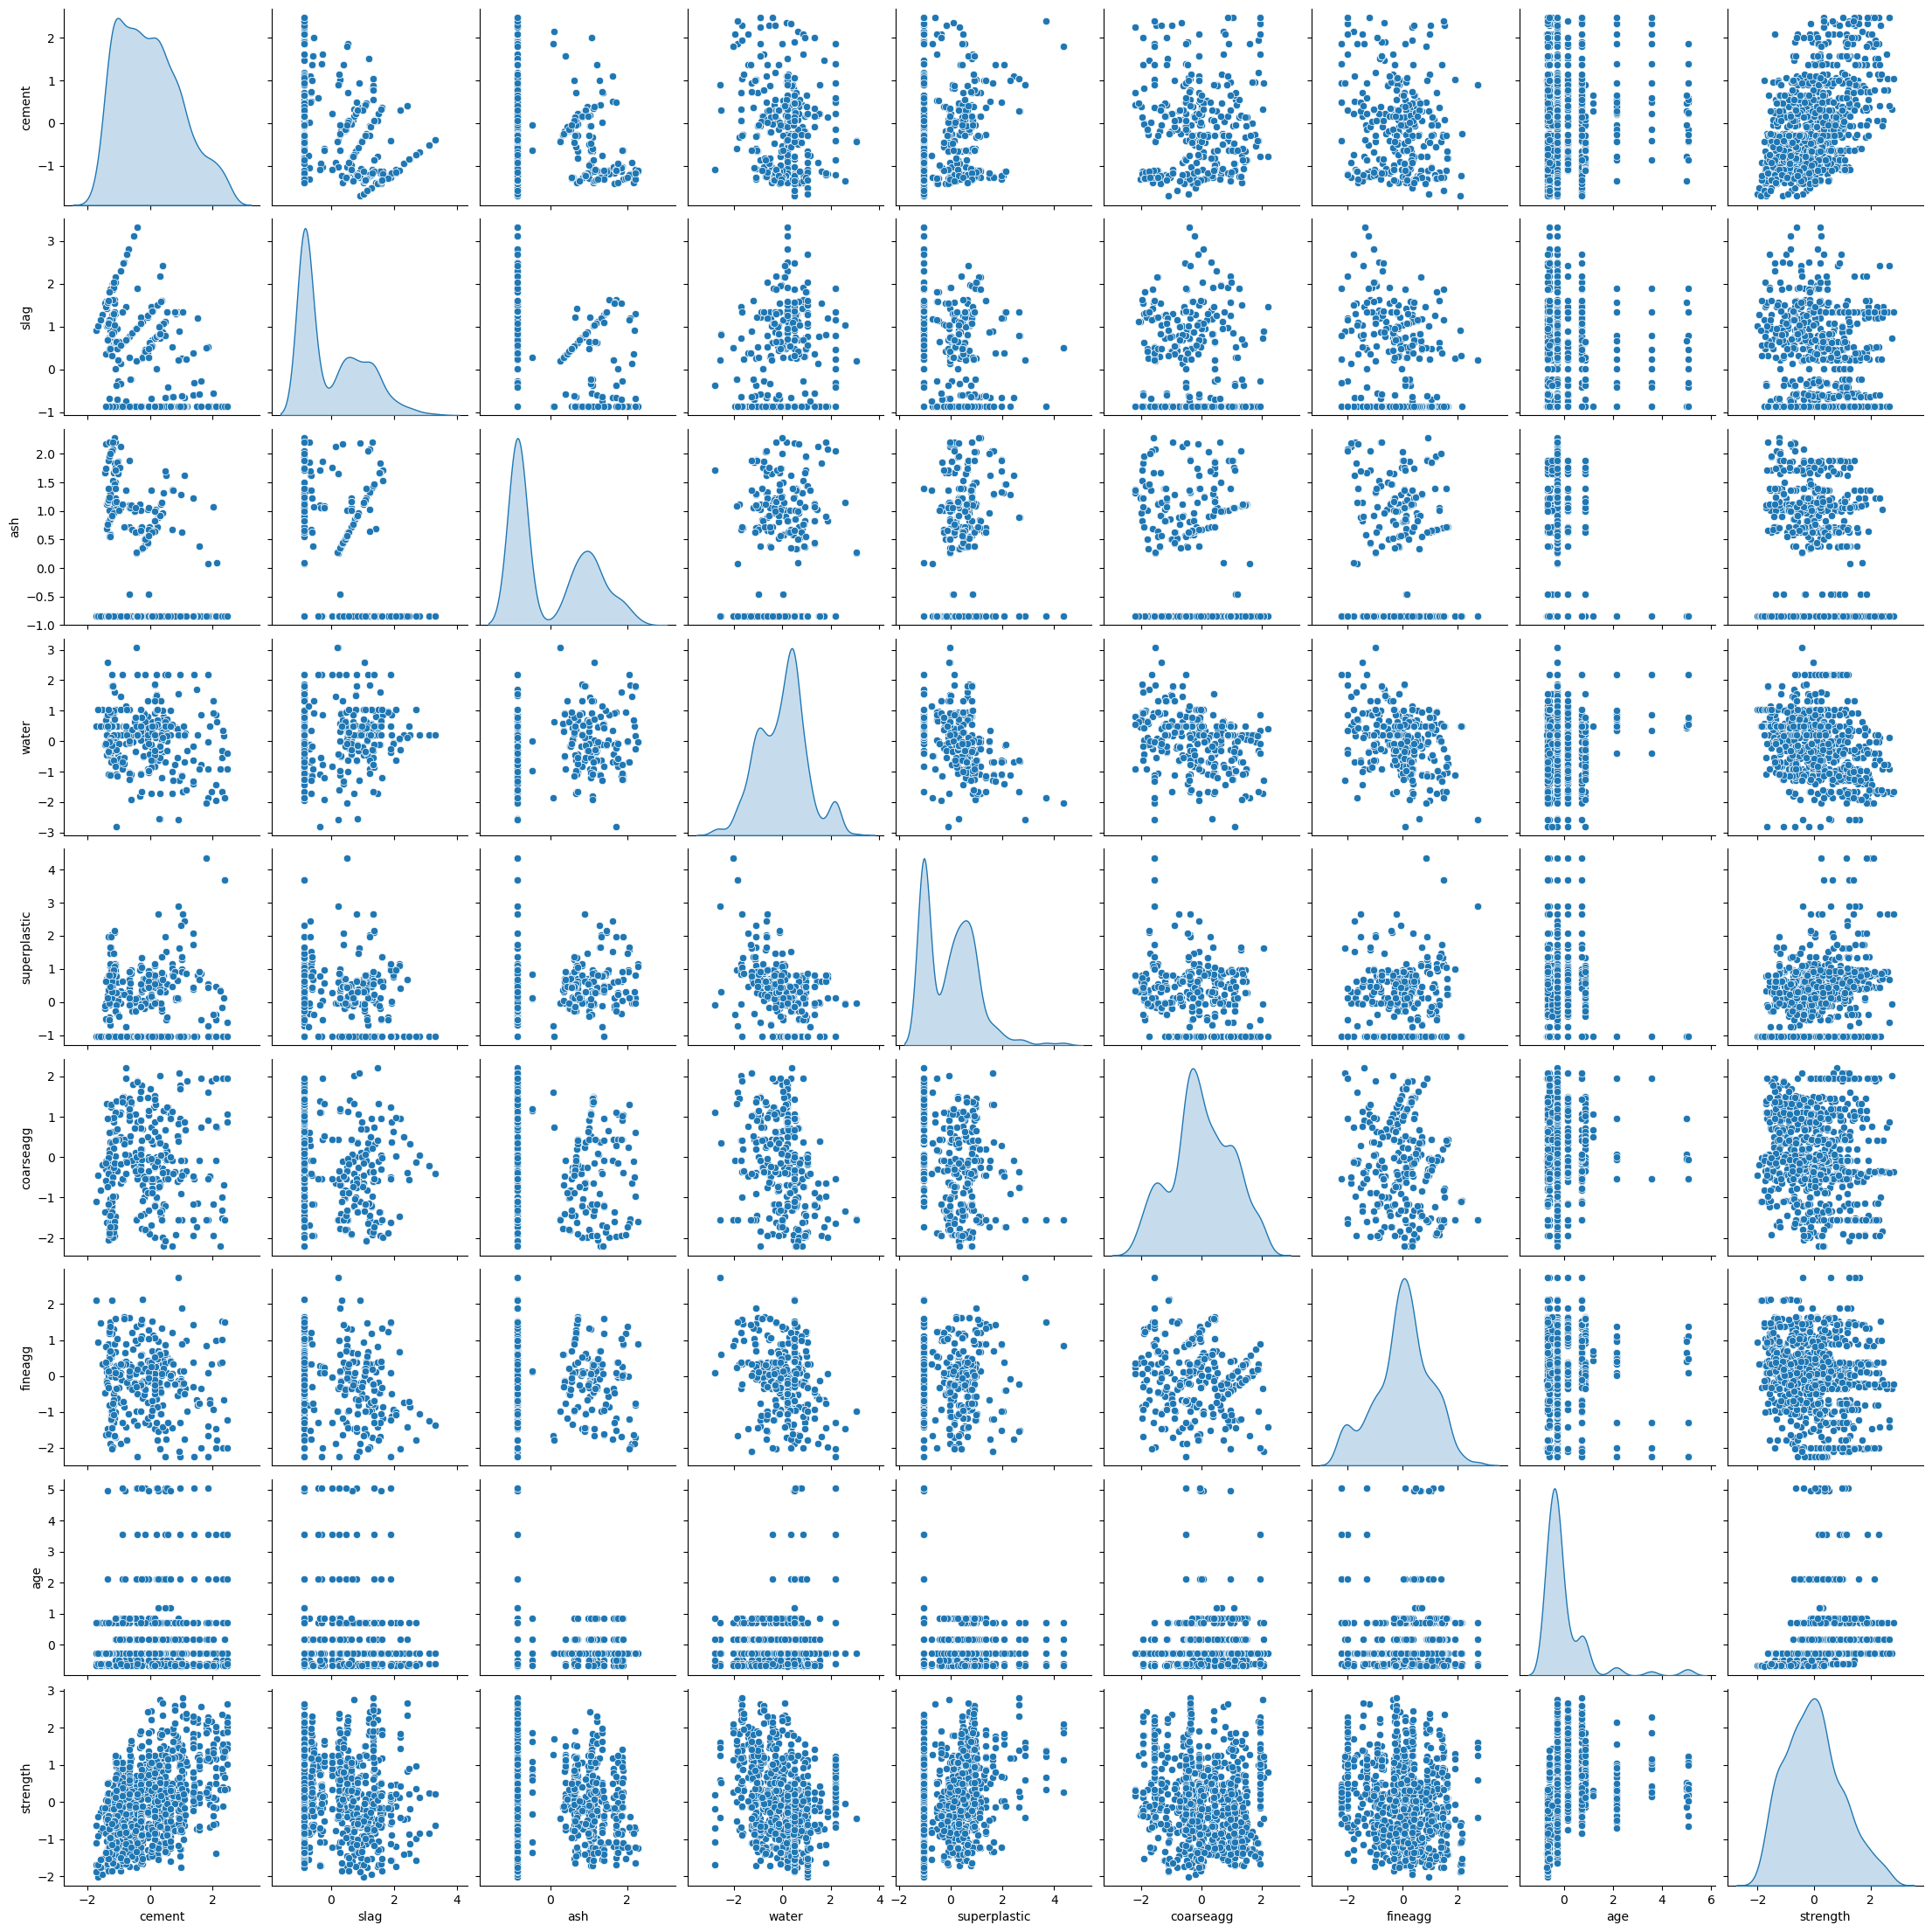

In [15]:
sns.pairplot(df,diag_kind='kde')

<AxesSubplot:>

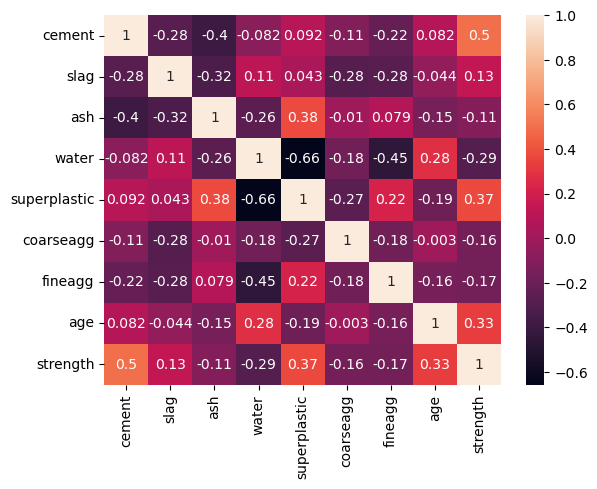

In [16]:
corr = df.corr()
sns.heatmap(corr,annot=True)
# strength and cement has good correlation

# Split data

In [17]:
x = df.drop(['strength'],axis=1)
y = df[['strength']]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

# Linear Regression

In [19]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train,y_train)

LinearRegression()

In [20]:
Lin_reg.score(x_train,y_train), Lin_reg.score(x_test,y_test)

(0.6031487540630229, 0.6339136715208274)

# Support Vector Regression

In [21]:
from sklearn.svm import SVR

### Kernel = linear

In [22]:
svr = SVR(kernel ='linear')
svr.fit(x_train,y_train)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [23]:
svr.score(x_train,y_train), svr.score(x_test,y_test)

(0.5830434421496876, 0.6282036485176288)

### kernel = rbf (Best Score)

In [24]:
svr = SVR(kernel='rbf',gamma='scale',C=1,epsilon=.2)
svr.fit(x_train,y_train)
# linear not performing good
# sigmoid negtive
# poly overfitting
# rbf c=1 good

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, epsilon=0.2)

In [25]:
svr.score(x_train,y_train), svr.score(x_test,y_test)

(0.8757517967744874, 0.8312655633508789)

### kerenel = poly

In [26]:
svr = SVR(kernel='poly',degree=3, gamma='scale',C=50,epsilon=.4)
svr.fit(x_train,y_train)
# Overfitting

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=50, epsilon=0.4, kernel='poly')

In [27]:
svr.score(x_train,y_train), svr.score(x_test,y_test)

(0.8086100067971632, 0.7086134869935481)

# KNN

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
knn = KNeighborsRegressor(n_neighbors=50,p=3, algorithm = 'kd_tree',weights='uniform')
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=50, p=3)

In [30]:
knn.score(x_train,y_train), knn.score(x_test,y_test)

(0.5473124720681399, 0.5050342225508768)

# Decision Tree ensemble

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
dtree = DecisionTreeRegressor(criterion='squared_error',max_depth=3,random_state=10)
dtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=10)

In [33]:
dtree.score(x_train,y_train), dtree.score(x_test,y_test)

(0.6358072763408258, 0.583104124329016)

# Ensemble Learning - Bagging

In [34]:
from sklearn.ensemble import BaggingRegressor

In [35]:
bgcl = BaggingRegressor(n_estimators=200, max_samples=50,random_state=1)
bgcl.fit(x_train,y_train)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(max_samples=50, n_estimators=200, random_state=1)

In [36]:
bgcl.score(x_train,y_train), bgcl.score(x_test,y_test)

(0.8037405437572912, 0.7774750070577815)

# Ensemble Learning - AdaBoosting

In [37]:
from sklearn.ensemble import AdaBoostRegressor

In [38]:
abcl = AdaBoostRegressor(n_estimators=300,learning_rate=0.7,random_state=1)
abcl.fit(x_train,y_train)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(learning_rate=0.7, n_estimators=300, random_state=1)

In [39]:
abcl.score(x_train,y_train), abcl.score(x_test,y_test)

(0.8165133829399245, 0.7739326940038707)

# Ensemble Learning - GradientBoost

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
gbcl = GradientBoostingRegressor(learning_rate=0.1,n_estimators=40,max_depth=2,max_features=7,random_state=1)
gbcl.fit(x_train,y_train)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=2, max_features=7, n_estimators=40,
                          random_state=1)

In [42]:
gbcl.score(x_train,y_train), gbcl.score(x_test,y_test)

(0.8292287034807964, 0.7864888580273863)

# Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rfrg = RandomForestRegressor(n_estimators=500,criterion='absolute_error',max_depth=2,random_state=1)
rfrg.fit(x_train,y_train)

C:\Users\priyanshu\AppData\Local\Temp\ipykernel_14156\2865306652.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfrg.fit(x_train,y_train)


RandomForestRegressor(criterion='absolute_error', max_depth=2, n_estimators=500,
                      random_state=1)

In [45]:
rfrg.score(x_train,y_train), rfrg.score(x_test,y_test)

(0.5646195552784823, 0.526884461802634)